# Predicting Ikea billy with fbprophet

Some time ago I scraped availability data from the IKEA website regarding the Ikea Billy product

In [1]:
import pandas as pd
from fbprophet import Prophet

Data is in a CSV file where each day contains the number of billies sold

In [67]:
df = pd.read_csv('daily_billy.csv')
df = df.assign(
    ds = pd.to_datetime(df.ds, utc=False)
)
 
df = (
    df
    .assign(ds = df.ds.dt.tz_localize(None))
    .query('y < 400')
)


In [68]:
df.head()

,ds,y
0,2016-09-16,173
1,2016-09-17,200
2,2016-09-18,152
3,2016-09-19,151
4,2016-09-20,110


### Define prophet object and fit

In [74]:
m = Prophet(
    yearly_seasonality = True,
    weekly_seasonality = True, 
    daily_seasonality = True)
m.fit(df)

In [75]:
#### Create a future data frame, 90 days ahead to for prediction

In [70]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
461,2017-12-26
462,2017-12-27
463,2017-12-28
464,2017-12-29
465,2017-12-30


In [76]:
### forecast
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
461,2017-12-26,125.580260,62.429201,189.276962
462,2017-12-27,141.273975,80.030574,201.191505
463,2017-12-28,142.167778,78.662166,201.535059
464,2017-12-29,180.146443,121.141853,248.578344
465,2017-12-30,237.225194,174.360779,300.007490


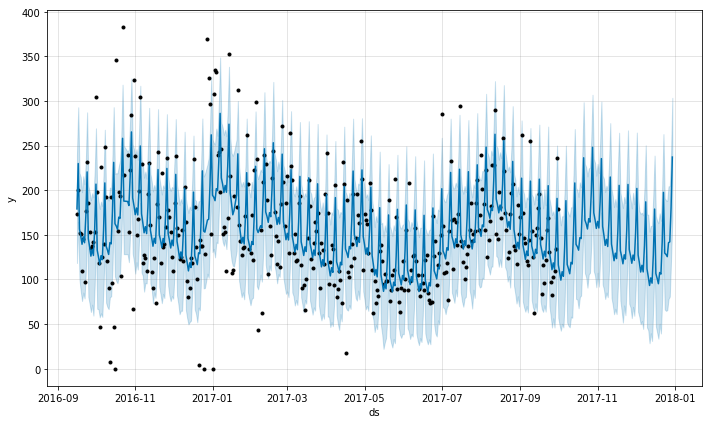

In [72]:
fig1 = m.plot(forecast)

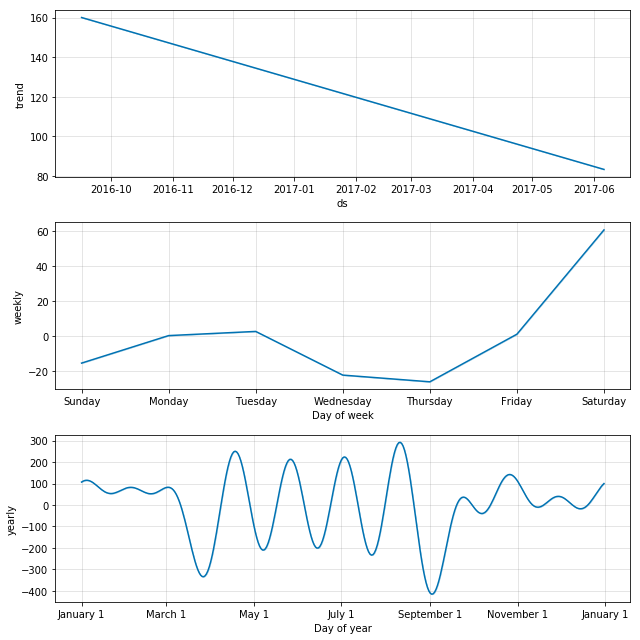

In [35]:
fig2 = m.plot_components(forecast)